# Table

## Imports

These are the imports that are used in the code :
- `time` is used to measure the time it takes to run the code
- `random` is used to generate random numbers
- `tqdm` is used to display a progress bar
- `matplotlib.pyplot` is used to plot the results

In [5]:
import time
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

## Class

The `Table` class is used to represent a hash table. It has the following methods :
- `__init__` : constructor for the class
- `_rehash` : rehash function to use for collision resolution
- `insert` : inserts a key-value pair into the table
- `delete` : deletes a key-value pair from the table
- `exist` : checks if a key exists in the table
- `value` : returns the value associated with a key
- `union` : returns a new table that is the union of the current table and the other table
- `intersection` : returns a new table that is the intersection of the current table and the other table
- `display` : displays the table

In [6]:
class Table:
    def __init__(self, table_size, hash_func, rehash_type):
        """
        Constructor for Table class

        :param table_size: size of the table
        :param hash_func: hash function to use
        :param rehash_type: rehash type to use
        """
        self.table_size = table_size
        self.table = [None] * self.table_size
        self.hash_func = hash_func
        self.rehash_type = rehash_type
        self.rehash_count = 0

    def _rehash(self, key, i):
        """
        Rehash function to use for collision resolution

        :param key: key to rehash
        :param i: iteration number
        :return: rehashed key
        """
        if self.rehash_type == 'linear':
            return (key + i) % self.table_size
        elif self.rehash_type == 'quadratic':
            return (key + i * i) % self.table_size
        elif self.rehash_type == 'double':
            hash1 = key % self.table_size
            hash2 = 1 + (key % (self.table_size - 2))
            return (hash1 + i * hash2) % self.table_size

    def insert(self, key, value):
        """
        Inserts a key-value pair into the table

        :param key: key to insert
        :param value: value to insert
        :return: True if successful, False otherwise
        """
        i = 0
        while i < self.table_size:
            hashed_key = self.hash_func(key)
            rehashed_key = self._rehash(hashed_key, i)
            if self.table[rehashed_key] is None:
                self.table[rehashed_key] = (key, value)
                return True
            elif self.table[rehashed_key][0] == key:
                self.table[rehashed_key] = (key, value)
                return True
            else:
                i += 1
                self.rehash_count += 1
        return False

    def delete(self, key):
        """
        Deletes a key-value pair from the table

        :param key: key to delete
        """
        i = 0
        while i < self.table_size:
            hashed_key = self.hash_func(key)
            rehashed_key = self._rehash(hashed_key, i)
            if self.table[rehashed_key] is None:
                return
            elif self.table[rehashed_key][0] == key:
                self.table[rehashed_key] = None
                return
            else:
                i += 1
        return

    def exist(self, key):
        """
        Checks if a key exists in the table

        :param key: key to check
        :return: True if key exists, False otherwise
        """
        i = 0
        while i < self.table_size:
            hashed_key = self.hash_func(key)
            rehashed_key = self._rehash(hashed_key, i)
            if self.table[rehashed_key] is None:
                return False
            elif self.table[rehashed_key][0] == key:
                return True
            else:
                i += 1
        return False

    def value(self, key):
        """
        Returns the value associated with a key

        :param key: key to check
        :return: value associated with key
        """
        i = 0
        while i < self.table_size:
            hashed_key = self.hash_func(key)
            rehashed_key = self._rehash(hashed_key, i)
            if self.table[rehashed_key] is None:
                return None
            elif self.table[rehashed_key][0] == key:
                return self.table[rehashed_key][1]
            else:
                i += 1
        return None

    def union(self, other_table):
        """
        Returns a new table that is the union of the current table and the other table

        :param other_table: other table to union with
        :return: new table that is the union of the current table and the other table
        """
        # Create a new table with the same size and hash function as the current table
        union_table = Table(self.table_size, self.hash_func, self.rehash_type)

        # Add all the elements from the current table to the new table
        for i in range(self.table_size):
            if self.table[i] is not None:
                union_table.insert(self.table[i][0], self.table[i][1])

        # Add all the elements from the other table to the new table
        for i in range(other_table.table_size):
            if other_table.table[i] is not None:
                union_table.insert(other_table.table[i][0], other_table.table[i][1])

        return union_table

    def intersection(self, other_table):
        """
        Returns a new table that is the intersection of the current table and the other table

        :param other_table: other table to intersect with
        :return: new table that is the intersection of the current table and the other table
        """
        # Create a new table with the same size and hash function as the current table
        intersection_table = Table(self.table_size, self.hash_func, self.rehash_type)

        # Add elements to the new table only if they exist in both tables
        for i in range(self.table_size):
            if self.table[i] is not None and other_table.exist(self.table[i][0]):
                intersection_table.insert(self.table[i][0], self.table[i][1])

        return intersection_table

    def display(self):
        """
        Displays the table
        """
        for i in range(self.table_size):
            print(f"{i}: {self.table[i]}")

## Tests

### Unit Tests

The following unit tests test the Table class and its methods.

In [7]:
def test_table(size=5, hash_func=lambda x: x % 5, rehash_type='linear'):
    """
    Tests the Table class

    :param size: size of table
    :param hash_func: hash function to use
    :param rehash_type: rehash function to use
    """

    # create a new table object
    table = Table(size, hash_func, rehash_type)

    # test insert method
    assert table.insert(10, "value1") is True
    assert table.insert(5, "value2") is True
    assert table.insert(20, "value3") is True

    # test exist method
    assert table.exist(10) is True
    assert table.exist(5) is True
    assert table.exist(20) is True
    assert table.exist(15) is False

    # test value method
    assert table.value(10) is "value1"
    assert table.value(5) is "value2"
    assert table.value(20) is "value3"
    assert table.value(15) is None

    # test delete method
    table.delete(10)
    assert table.exist(10) is False
    assert table.value(10) is None

    # create another table object
    other_table = Table(size, hash_func, rehash_type)
    other_table.insert(5, "other_value1")
    other_table.insert(15, "other_value2")
    other_table.insert(25, "other_value3")

    # test union method
    union_table = table.union(other_table)
    assert union_table.exist(5) is True
    assert union_table.exist(15) is True
    assert union_table.exist(20) is True
    assert union_table.exist(25) is True

    # test intersection method
    intersection_table = table.intersection(other_table)
    assert intersection_table.exist(5) is True
    assert intersection_table.exist(15) is False
    assert intersection_table.exist(20) is False
    assert intersection_table.exist(25) is False

    # test display method
    table.display()

In [8]:
test_table(5, lambda x: x % 5, 'linear')

0: None
1: (5, 'value2')
2: (20, 'value3')
3: None
4: None


### Rehasing tests

The following tests test the Table class with rehashing.
We test the time it takes to insert and search for n elements in a table with a size of table_size (default is 100).
There are three types of rehashing: linear, quadratic, and double hashing.
the results are stored in a dictionary.

The following code tests the time it takes to insert and search for 1 to 100000 elements in a table with a size between 100 and 100000.
After tests, the results are plotted in a graph.

In [12]:
result = {
    'linear': {},
    'quadratic': {},
    'double': {}
}

def test_rehashing(n, rehash_type='linear', table_size=100):
    """
    test the Table class with rehashing

    :param n: number of elements to insert
    :param rehash_type: rehash function to use
    """

    # Create a table with size 10
    table = Table(table_size, lambda x: x % 10, rehash_type)

    # Insert n random elements
    insert_start_time = time.time()
    for i in range(n):
        key = random.randint(0, 100)
        value = i
        table.insert(key, value)
    insert_end_time = time.time()

    # Time the search for all n elements
    search_start_time = time.time()
    for i in range(n):
        key = random.randint(0, 100)
        table.value(key)
    search_end_time = time.time()

    result[rehash_type].update({
        n: {
            'table_size': table.table_size,
            'number_of_elements': n,
            'search_time': search_end_time - search_start_time,
            'insert_time': insert_end_time - insert_start_time,
            'average_time_per_search': (search_end_time - search_start_time) / n,
            'rehash_count': table.rehash_count,
        }
    })

Progress for linear rehashing with table size 10: 100%|██████████| 100/100 [00:42<00:00,  2.37it/s]
Progress for quadratic rehashing with table size 10: 100%|██████████| 100/100 [00:44<00:00,  2.24it/s]
Progress for double rehashing with table size 10: 100%|██████████| 100/100 [00:58<00:00,  1.70it/s]


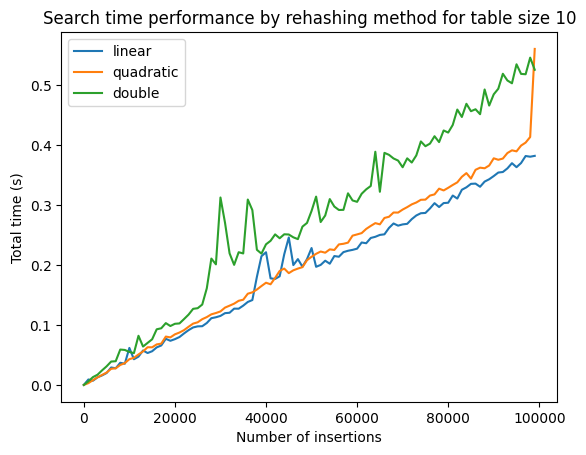

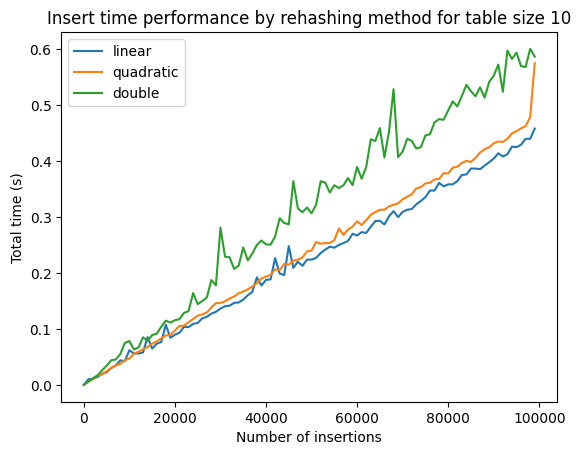

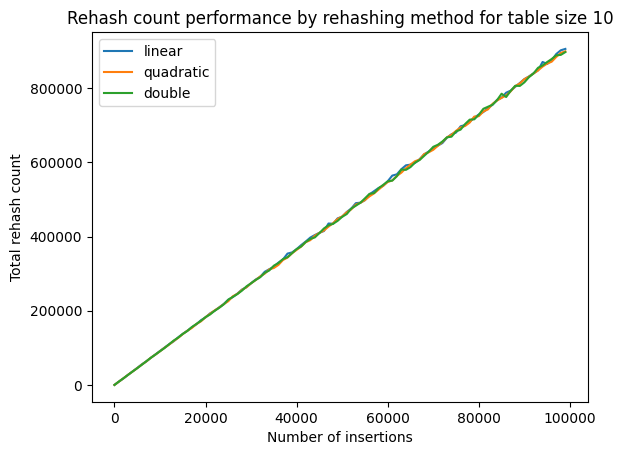

Progress for linear rehashing with table size 100: 100%|██████████| 100/100 [03:02<00:00,  1.82s/it]
Progress for quadratic rehashing with table size 100: 100%|██████████| 100/100 [01:07<00:00,  1.49it/s]
Progress for double rehashing with table size 100: 100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


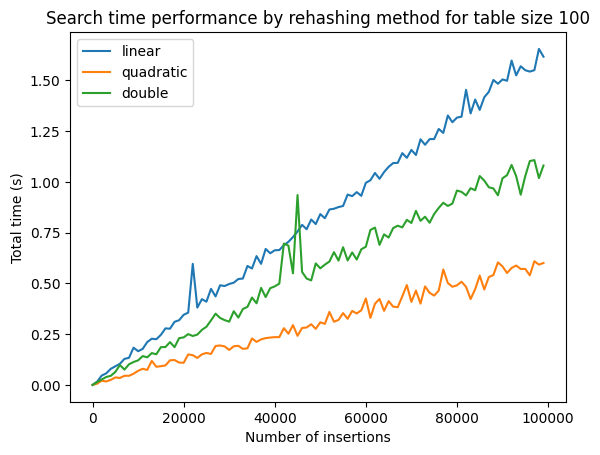

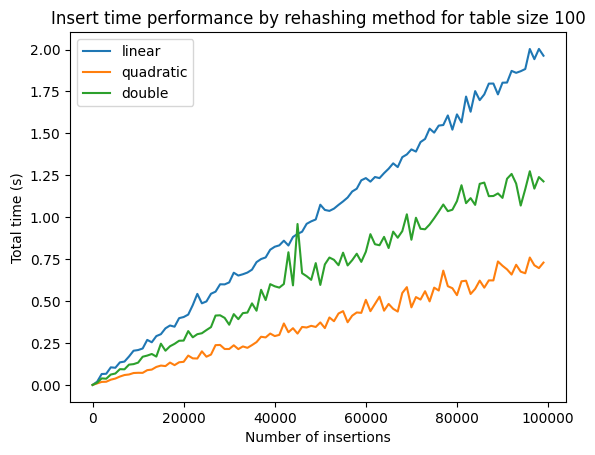

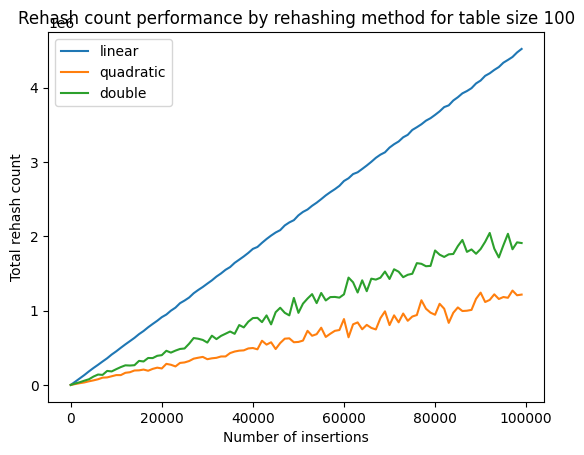

Progress for linear rehashing with table size 1000: 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
Progress for quadratic rehashing with table size 1000: 100%|██████████| 100/100 [00:44<00:00,  2.25it/s]
Progress for double rehashing with table size 1000: 100%|██████████| 100/100 [01:22<00:00,  1.20it/s]


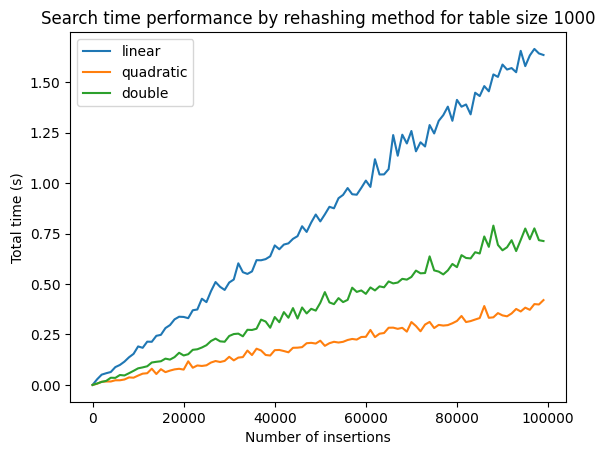

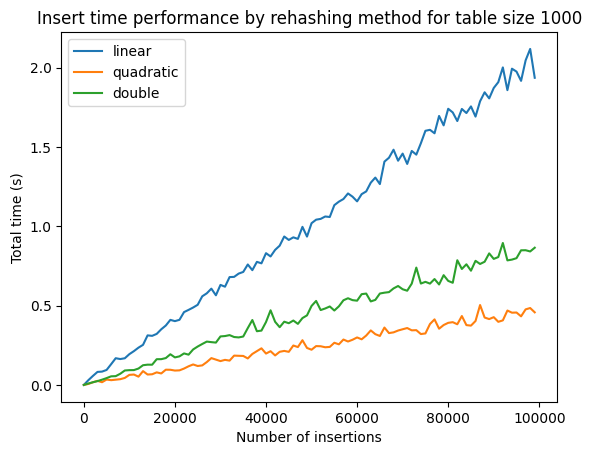

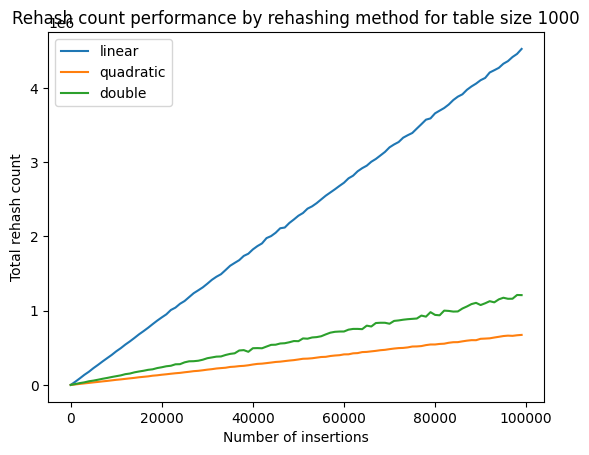

Progress for linear rehashing with table size 5000: 100%|██████████| 100/100 [03:09<00:00,  1.89s/it]
Progress for quadratic rehashing with table size 5000: 100%|██████████| 100/100 [00:45<00:00,  2.20it/s]
Progress for double rehashing with table size 5000: 100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


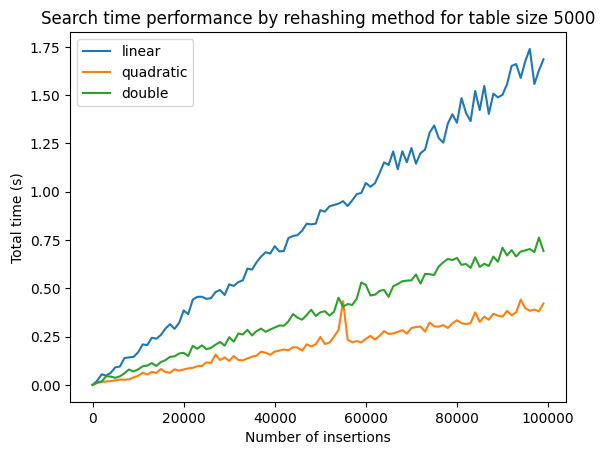

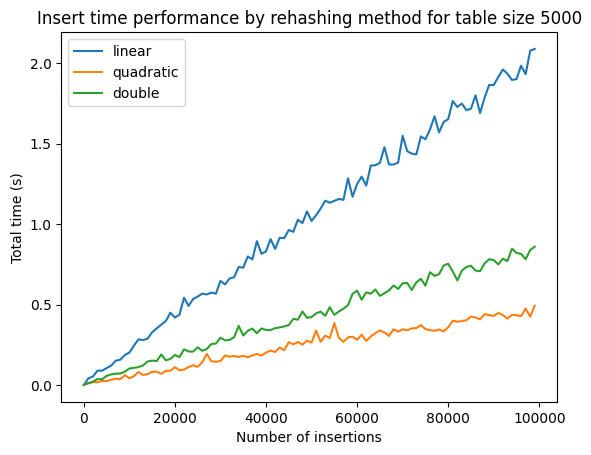

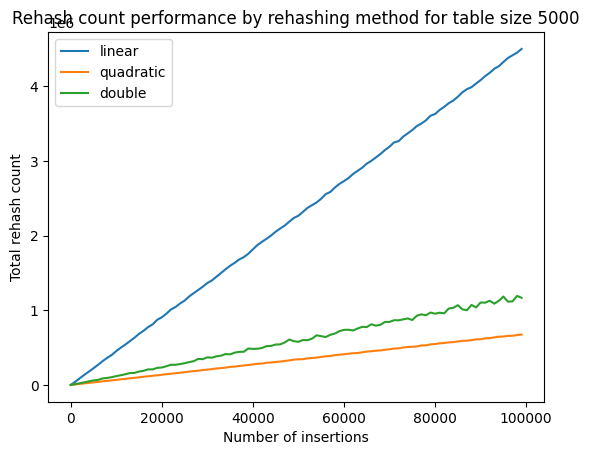

Progress for linear rehashing with table size 10000: 100%|██████████| 100/100 [03:07<00:00,  1.88s/it]
Progress for quadratic rehashing with table size 10000: 100%|██████████| 100/100 [00:44<00:00,  2.24it/s]
Progress for double rehashing with table size 10000: 100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


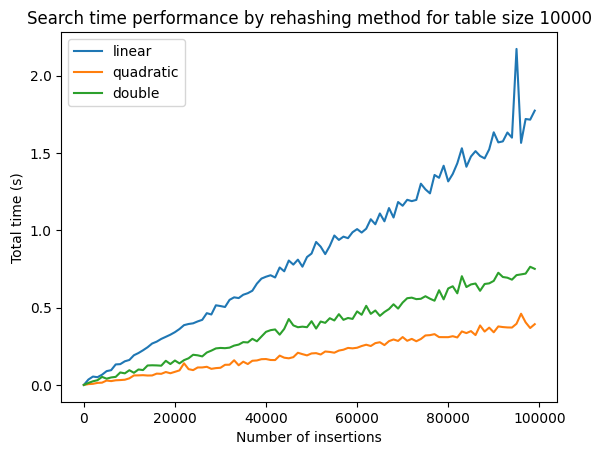

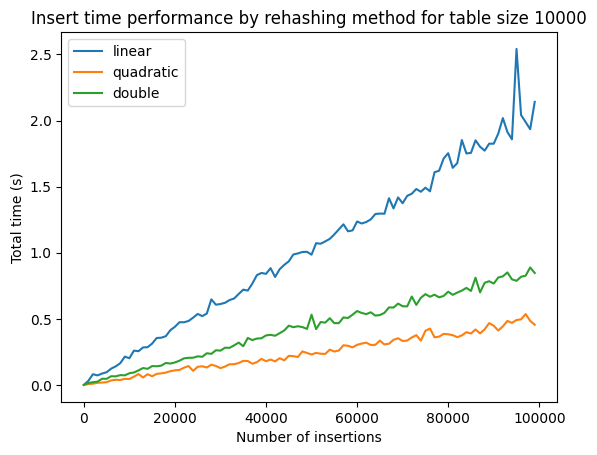

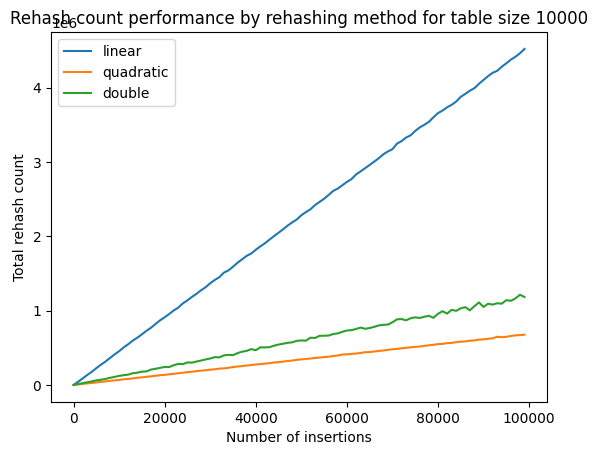

Progress for linear rehashing with table size 50000: 100%|██████████| 100/100 [03:12<00:00,  1.93s/it]
Progress for quadratic rehashing with table size 50000: 100%|██████████| 100/100 [00:43<00:00,  2.28it/s]
Progress for double rehashing with table size 50000: 100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


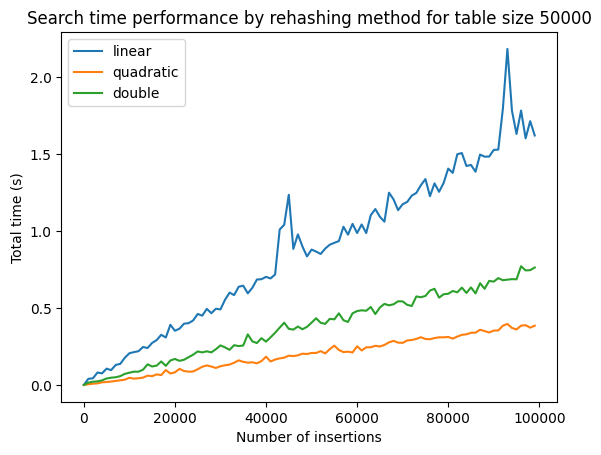

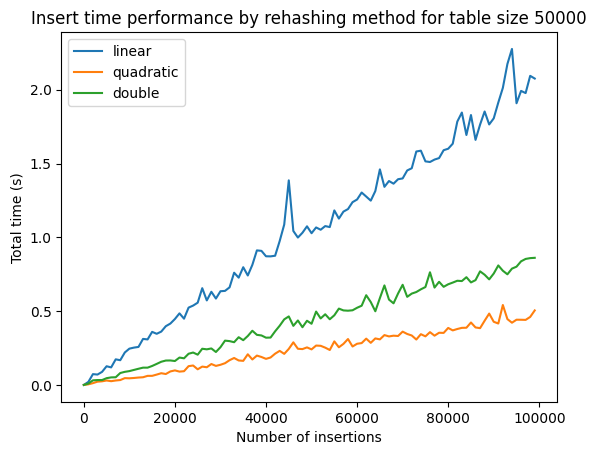

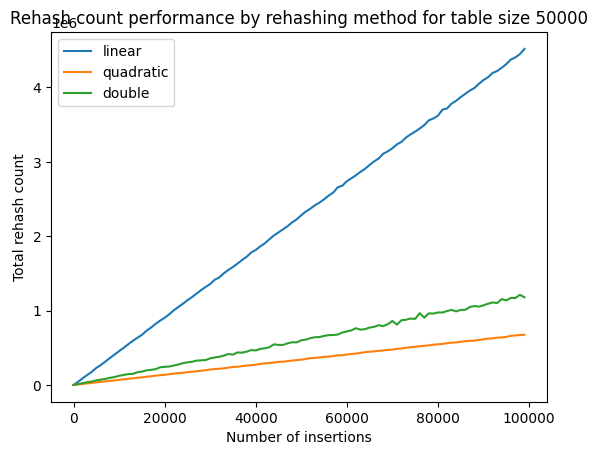

Progress for linear rehashing with table size 100000: 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
Progress for quadratic rehashing with table size 100000: 100%|██████████| 100/100 [00:42<00:00,  2.34it/s]
Progress for double rehashing with table size 100000: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


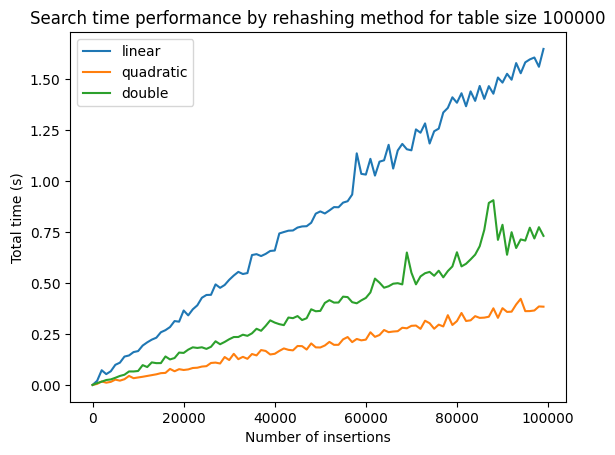

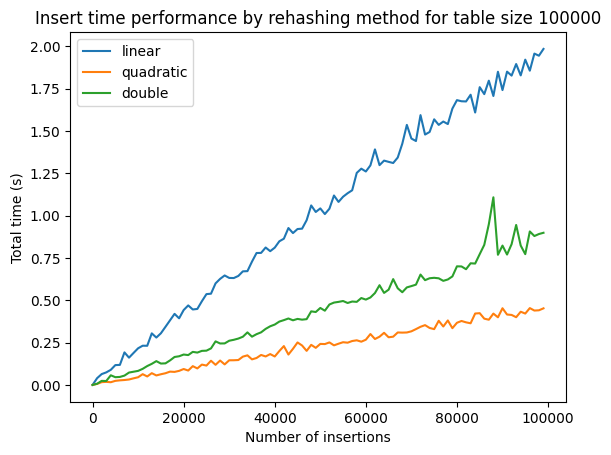

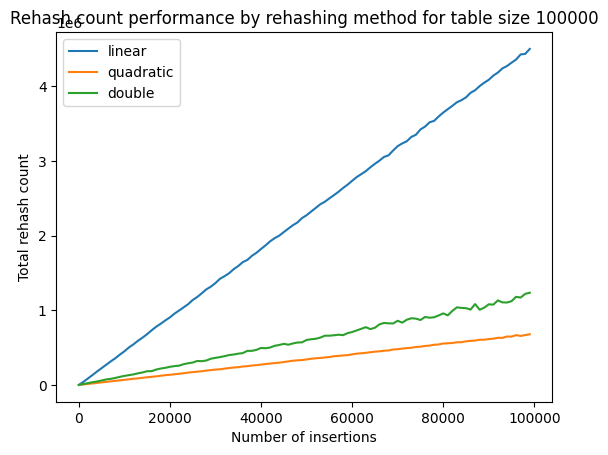

In [13]:
for table_size in [10, 100, 1000, 5000, 10000, 50000, 100000]:

    list_rehash_types = ['linear', 'quadratic', 'double']
    for rehash_type in list_rehash_types:
        for i in tqdm(range(1, 100000, 1000), desc=f'Progress for {rehash_type} rehashing with table size {table_size}'):
            test_rehashing(i, rehash_type, table_size)

    linear_data = []
    quadratic_data = []
    double_data = []

    for method in ['linear', 'quadratic', 'double']:
        data = []
        for key in range(1, 100000, 1000):
            data.append([key, result[method][key]['number_of_elements'], result[method][key]['search_time'], result[method][key]['insert_time'], result[method][key]['rehash_count']])
        if method == 'linear':
            linear_data = data
        elif method == 'quadratic':
            quadratic_data = data
        elif method == 'double':
            double_data = data

    plt.plot([x[1] for x in linear_data], [x[2] for x in linear_data], label='linear')
    plt.plot([x[1] for x in quadratic_data], [x[2] for x in quadratic_data], label='quadratic')
    plt.plot([x[1] for x in double_data], [x[2] for x in double_data], label='double')

    plt.xlabel('Number of insertions')
    plt.ylabel('Total time (s)')
    plt.title(f'Search time performance by rehashing method for table size {table_size}')
    plt.legend()
    plt.show()

    plt.plot([x[1] for x in linear_data], [x[3] for x in linear_data], label='linear')
    plt.plot([x[1] for x in quadratic_data], [x[3] for x in quadratic_data], label='quadratic')
    plt.plot([x[1] for x in double_data], [x[3] for x in double_data], label='double')

    plt.xlabel('Number of insertions')
    plt.ylabel('Total time (s)')
    plt.title(f'Insert time performance by rehashing method for table size {table_size}')
    plt.legend()
    plt.show()

    plt.plot([x[1] for x in linear_data], [x[4] for x in linear_data], label='linear')
    plt.plot([x[1] for x in quadratic_data], [x[4] for x in quadratic_data], label='quadratic')
    plt.plot([x[1] for x in double_data], [x[4] for x in double_data], label='double')

    plt.xlabel('Number of insertions')
    plt.ylabel('Total rehash count')
    plt.title(f'Rehash count performance by rehashing method for table size {table_size}')
    plt.legend()
    plt.show()